<a href="https://colab.research.google.com/github/JoseBatista2010/ML2023-Jose-Batista/blob/master/Limpando_e_Filtrando_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


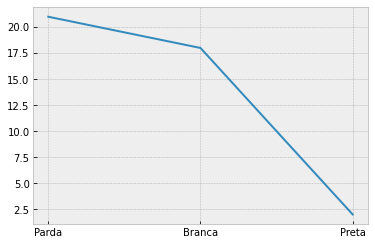

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

import re
path = '/content/drive/MyDrive/UFC/2023_1/Machine_Learning/Dataset/Feminicidio_2015_2022.xlsx'
df = pd.read_excel(path, sheet_name= 7)
df.fillna("NOT SPECIFIED", inplace=True)
#df['DATA_NASCIMENTO_PESSOA']
df['DATA_NASCIMENTO_PESSOA'] = pd.to_datetime(df['DATA_NASCIMENTO_PESSOA'], errors='coerce')

df['ANO'] = df['DATA_NASCIMENTO_PESSOA'].dt.year
df['MES'] = df['DATA_NASCIMENTO_PESSOA'].dt.month
df['DIA'] = df['DATA_NASCIMENTO_PESSOA'].dt.day
df = df.loc[df['MUNICIPIO_CIRCUNSCRICAO'] == 'São Paulo']
plt.plot(df['COR_PELE'].value_counts())


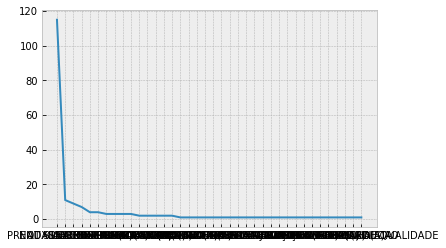

In [69]:
plt.plot(df['PROFISSAO'].value_counts())
